This is a depreciated notebook. Anything good in it has been moved over to vis_methods, what's left is me calling a couple vis methods functions and some really bad functions that should not see the light of day

Import packages

In [2]:
import env_methods as em
import vis_methods as vis
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import numpy as np
import math
import time
import datetime as dt

Basic parameters

In [3]:
#Define bounding box in North America
lat_start = 0
lat_end = 90
lon_start = -179
lon_end =  -30

#Data paths
main_path = r'C:\Users\bpara\Geo data'

temps_path = r'\temp'
geomean_path = r'\geopotential mean'
rain_path = r'\surface precip'
snow_path = r'\snow depth'
moisture_path = r'\soil moisture'
shum_path = r'\specific humidity'

#Time stuff
month_to_show = 4 #What number of month to show, 0 = Dec 1843, 1 = Jan 1844, 2 = Feb 1844...
months = ["December", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November"]

Import data

In [4]:
temp_data = em.get_data(main_path+temps_path, False, [12, 1843, 12, 1844])
mean_data = em.get_data(main_path+geomean_path, False, [12, 1843, 12, 1844])
wind_data = em.get_data(main_path+r'\wind', False, [12, 1843, 12, 1844])

acquring data from air.2m.mon.mean.nc
acquring data from hgt.mon.mean.nc
acquring data from uwnd.mon.mean.nc
acquring data from vwnd.mon.mean.nc


Draw the mapping

In [5]:
vis.plot_data(shum_data["lon"], shum_data["lat"], 
              shum_data["shum"][em.find_closest_val(dt.datetime(1994, 1,1), rain_data["time"])][1], 
          "Geopotential Height (m)", "Geopotential Height Mean at 850mb in January 1994", lon_start, lon_end, lat_start, lat_end)
vis.plot_data(temp_data["lon"], temp_data["lat"], temp_data["air"][month_to_show], "Temperature, (K)", 
          "Average Surface Temp in April 1844", lon_start, lon_end, lat_start, lat_end)

NameError: name 'shum_data' is not defined

And now for vector wind

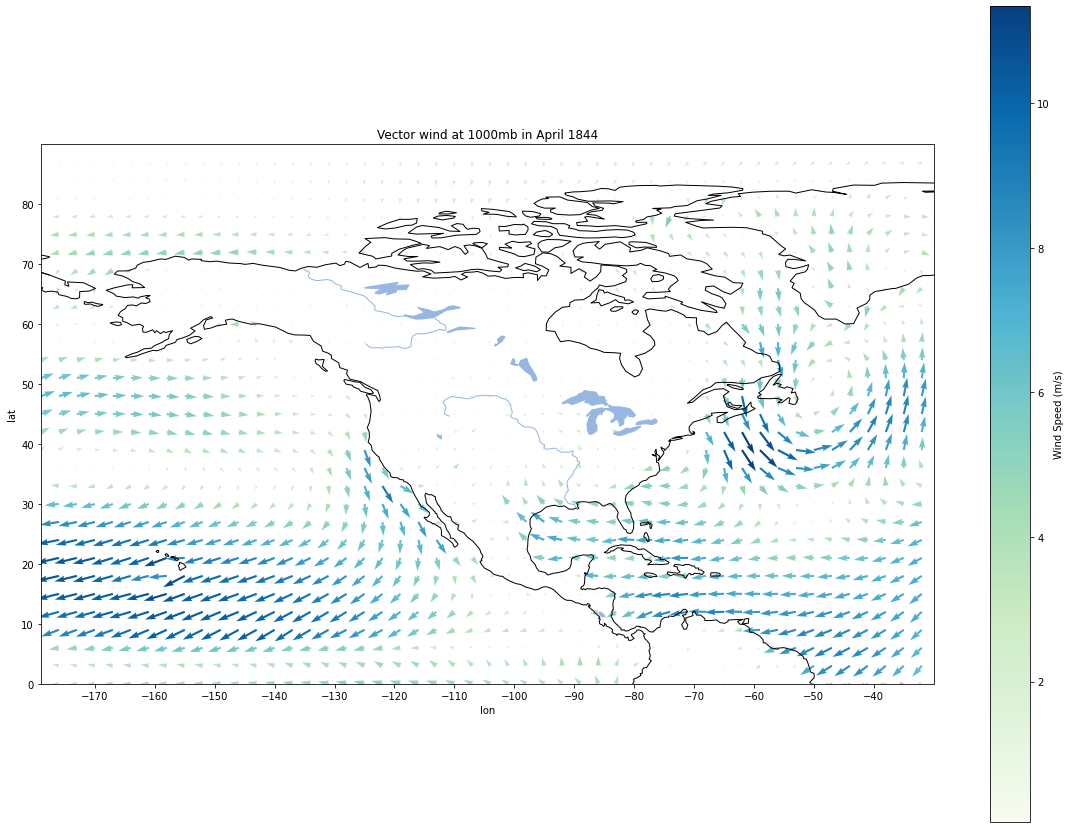

In [6]:
vis.plot_vector_data(wind_data["lon"], wind_data["lat"], wind_data["nc_vars"]["uwnd"][month_to_show][0], 
                 wind_data["nc_vars"]["vwnd"][month_to_show][0], "Vector wind at 1000mb in April 1844", "Wind Speed (m/s)",
                 lon_start, lon_end, lat_start, lat_end)

Plain vector wind can get a little messy with really long arrows, this one normalizes the length of all the arrows and only uses the color for magnitude

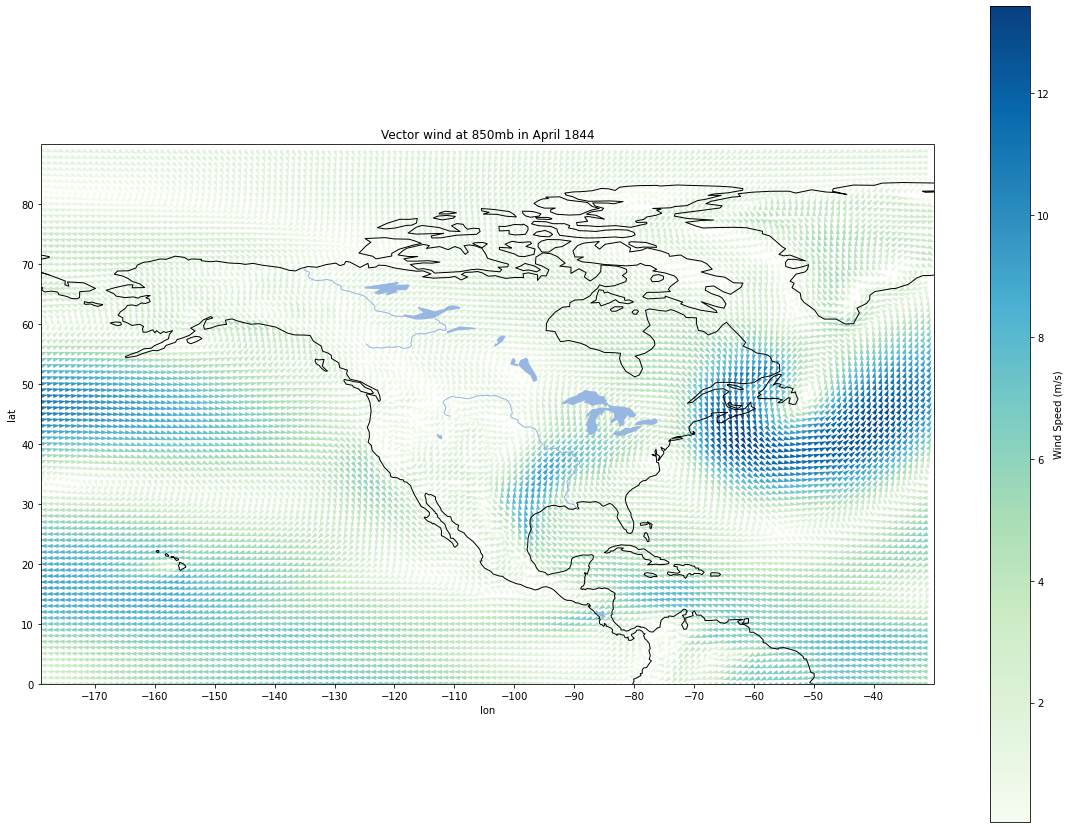

In [7]:
vis.plot_nvector_data(wind_data["lon"], wind_data["lat"], wind_data["nc_vars"]["uwnd"][month_to_show][1], 
                 wind_data["nc_vars"]["vwnd"][month_to_show][1], "Vector wind at 850mb in April 1844", "Wind Speed (m/s)",
                 lon_start, lon_end, lat_start, lat_end)

In [ ]:
wind_data

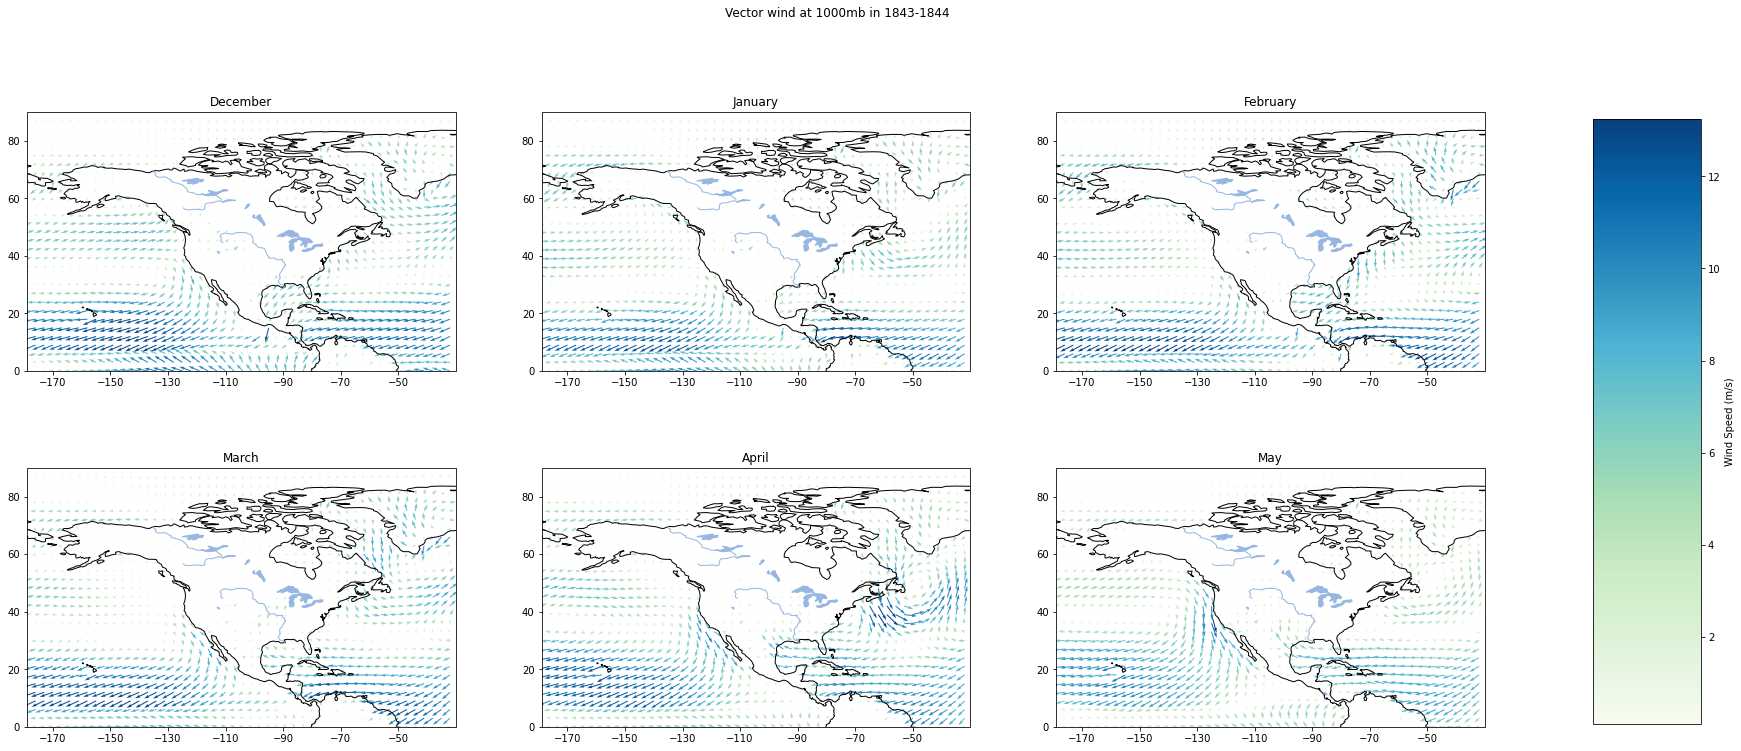